<a href="https://colab.research.google.com/github/zenml-io/zenml/blob/main/examples/quickstart/notebooks/quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("data/BTC_feature_data.csv", index_col="Unnamed: 0", parse_dates=True)

We drop all missing values since they are created due to lag of the features created

In [3]:
df.dropna(inplace=True)

The split of the dataset will be made based on the assumption that each row is independent given that we are controling the time and not using it for our predictions

In [12]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

n_val, n_test, n_train, n

idx =np.arange(n)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

y_train = df_train.phigh_day_touch.values
y_val = df_val.phigh_day_touch.values

In [5]:
#from sklearn.model_selection import train_test_split
#df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
#df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

#y_train = df_train.phigh_day_touch.values
#y_val = df_val.phigh_day_touch.values

In [13]:
df_train.tail()

,phigh_day_touch,plow_day_touch,phigh_night_touch,plow_night_touch,ret_distance_phigh_day_open,ret_distance_plow_day_open,ret_distance_phigh_night_open,ret_distance_plow_night_open
2020-09-29,0,0,0,0,-0.016091,-0.006814,-0.011604,0.012821
2020-09-30,1,0,0,0,-0.005836,0.008662,-0.012840,0.005895
2020-10-01,1,1,0,1,0.008053,0.019120,-0.003117,0.017017
2020-10-02,0,1,0,0,-0.037295,0.005009,-0.016443,0.011112
2020-10-03,1,0,1,0,-0.006081,0.009532,-0.004202,0.006931


Since we treat every row as an independent event we reset the index

In [7]:
#df_train.reset_index(inplace=True, drop=True)

In [14]:
df_train.head(2)

,phigh_day_touch,plow_day_touch,phigh_night_touch,plow_night_touch,ret_distance_phigh_day_open,ret_distance_plow_day_open,ret_distance_phigh_night_open,ret_distance_plow_night_open
2017-08-18,0,1,0,1,-0.040670,0.024336,-0.015681,0.040720
2017-08-19,0,1,0,0,-0.051679,0.028602,-0.021433,0.063636


In [15]:
for col in df_train.columns:
	print(col)
	print(df_train[col].unique()[:5])
	print(df_train[col].nunique())
	print()

phigh_day_touch
[0 1]
2

plow_day_touch
[1 0]
2

phigh_night_touch
[0 1]
2

plow_night_touch
[1 0]
2

ret_distance_phigh_day_open
[-0.04066982 -0.05167942  0.00513655 -0.04442013 -0.02303253]
1142

ret_distance_plow_day_open
[ 0.02433619  0.02860243  0.04340568 -0.01559058  0.00951483]
1142

ret_distance_phigh_night_open
[-0.01568104 -0.02143289 -0.02044131 -0.04113989 -0.02984407]
1141

ret_distance_plow_night_open
[0.04071968 0.06363636 0.02290818 0.01178732 0.16147353]
1142



## EDA
- Ranges of values
- Missing values
- Analysis of the target variable
- Feature importance analysis

In [16]:
categorical = ["phigh_day_touch", "plow_day_touch","phigh_night_touch", "plow_night_touch"]

numerical = ["ret_distance_phigh_day_open", "ret_distance_plow_day_open", 
            "ret_distance_phigh_night_open", "ret_distance_plow_night_open"]

### Ranges of values

In [17]:
df_train[numerical].describe().round(4).T

,count,mean,std,min,25%,50%,75%,max
ret_distance_phigh_day_open,1142.0,-0.0153,0.0358,-0.2365,-0.0293,-0.0107,0.0015,0.1462
ret_distance_plow_day_open,1142.0,0.0206,0.0398,-0.2058,0.0016,0.0140,0.0356,0.3005
ret_distance_phigh_night_open,1142.0,-0.0217,0.0241,-0.2446,-0.0274,-0.0136,-0.0067,0.0000
ret_distance_plow_night_open,1142.0,0.0257,0.0301,0.0004,0.0083,0.0163,0.0324,0.4620


<AxesSubplot:>

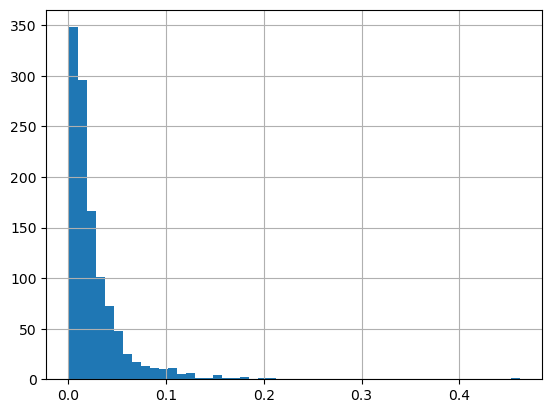

In [18]:
df_train['ret_distance_plow_night_open'].hist(bins=50)

The exploratory data analysis of the numerical features shows that the percentage distance between the high of the previous trading session and the open of the next session has a mean negative return of -0.0158 with standard deviation of 0.00345, the range of values is between -0.201 and 0.146.

The results for the distance between the low of the previous day session and the open of the day shows a mean of 0.0218 with standard deviation of 0.0401. The range of values are between -0.1684 and 0.3005.

Night session has interesting properties, the open of the day cannot be higher than the previous night high, and the open cannot be lower than the previous night low. By definition those distance has a left for the distance with previous night high and right skewed distribution for the distance between previous night low. 

### Missing values

In [19]:
df_train.isnull().sum()

phigh_day_touch                  0
plow_day_touch                   0
phigh_night_touch                0
plow_night_touch                 0
ret_distance_phigh_day_open      0
ret_distance_plow_day_open       0
ret_distance_phigh_night_open    0
ret_distance_plow_night_open     0
dtype: int64

There are no missing values in our dataset since we drop all missing values before spliting the data since the nature of missing values was due to we have lag calculation for the features

### Target variable

Since we want to create four models to have four different targets we need to evaluate four different outcomes, however in this project we limit to predicting the probability of the high of the previous day and leave the other target for a later update.

In [20]:
for cat in categorical:
    print(df_train[cat].value_counts(normalize=True))

0    0.689142
1    0.310858
Name: phigh_day_touch, dtype: float64
0    0.672504
1    0.327496
Name: plow_day_touch, dtype: float64
0    0.642732
1    0.357268
Name: phigh_night_touch, dtype: float64
0    0.664623
1    0.335377
Name: plow_night_touch, dtype: float64


The first target feature is a binary outcome that evaluate if the price reach the previous day high, in the results 68% of the time we do reach the previous high, previous low is reach 70% of the time, and previous night high is reach 63% of the time and previous night low is reach 70% of the time.

### Feature importance

In [21]:
df_train[numerical].corrwith(df_train.phigh_day_touch).to_frame('correlation')

,correlation
ret_distance_phigh_day_open,0.198682
ret_distance_plow_day_open,0.172307
ret_distance_phigh_night_open,0.216188
ret_distance_plow_night_open,0.016076


The independent features doesn't show strong correlation between each other which match the assumption of no multicolinearity for linear models.

In [22]:
from sklearn.metrics import roc_auc_score
feature_auc_score = []
for c in numerical:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    
    print('%9s, %.3f' % (c, auc))

ret_distance_phigh_day_open, 0.685
ret_distance_plow_day_open, 0.647
ret_distance_phigh_night_open, 0.654
ret_distance_plow_night_open, 0.540


The feature importance shows that distance from the previous high is the most important feature followed by the distance from the low of the previous day and finally the distance on previous night features

In [23]:
df_train.groupby(by='phigh_day_touch')[numerical].mean()

,ret_distance_phigh_day_open,ret_distance_plow_day_open,ret_distance_phigh_night_open,ret_distance_plow_night_open
phigh_day_touch,,,,
0,-0.020076,0.015975,-0.025199,0.025403
1,-0.004716,0.030780,-0.013965,0.026448


<AxesSubplot:>

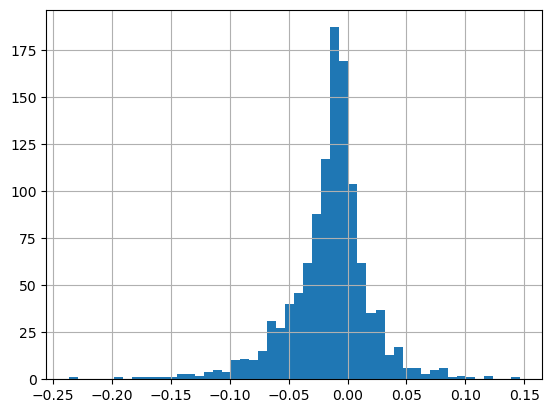

In [24]:
df_train["ret_distance_phigh_day_open"].hist(bins=50)

<AxesSubplot:>

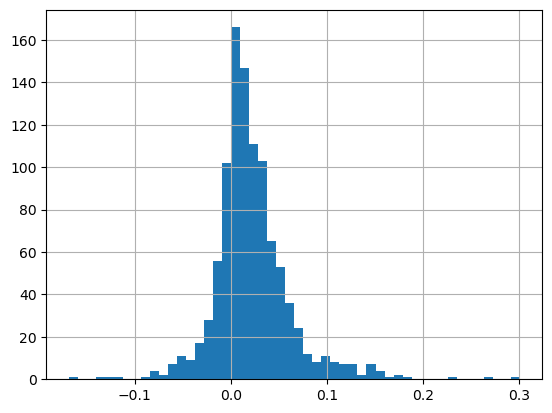

In [29]:
df_train["ret_distance_plow_day_open"].hist(bins=50)

<AxesSubplot:>

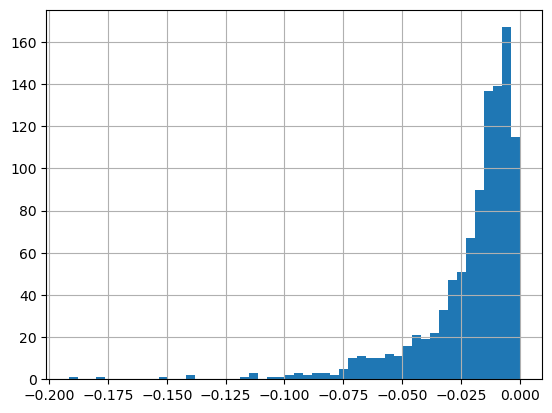

In [30]:
df_train["ret_distance_phigh_night_open"].hist(bins=50)

<AxesSubplot:>

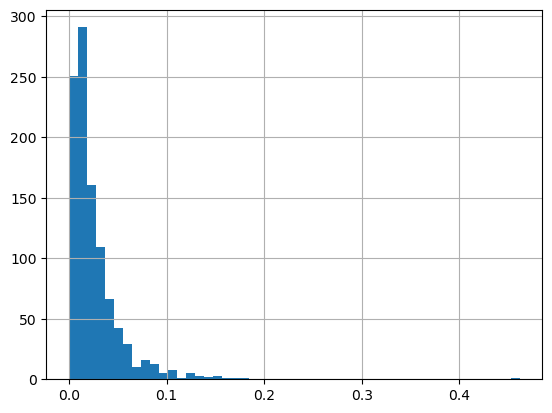

In [31]:
df_train["ret_distance_plow_night_open"].hist(bins=50)

## Model Training

- Train a logistic regression model
- Train a Random Forest Model (Tune parameters)
- Tain a XGBosst Model (Tune parameters)

In [25]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

train_dicts = df_train[numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

test_dicts = df_test[numerical].to_dict(orient='records')
X_test = dv.transform(test_dicts)

### Logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [27]:
y_pred = model.predict_proba(X_val)[:, 1]
phigh = y_pred > 0.5
(y_val == phigh).mean()

0.6263157894736842

The prediction accuracy of the prediction in the validation set with logistic regression is 0.626

### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [29]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.832169
1,5,20,0.826577
2,5,30,0.827849
3,5,40,0.830660
4,5,50,0.832465


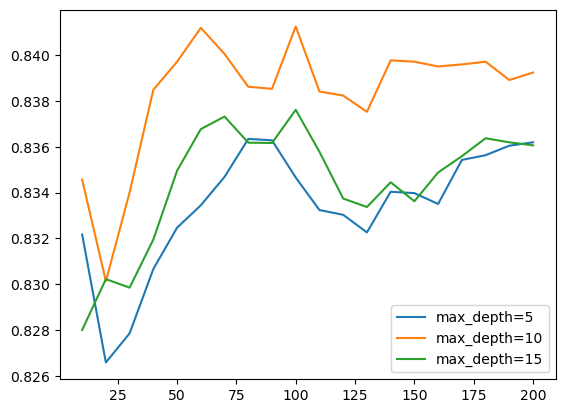

In [30]:
# Graphing 
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

Best max_depth is 10

In [31]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=10,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

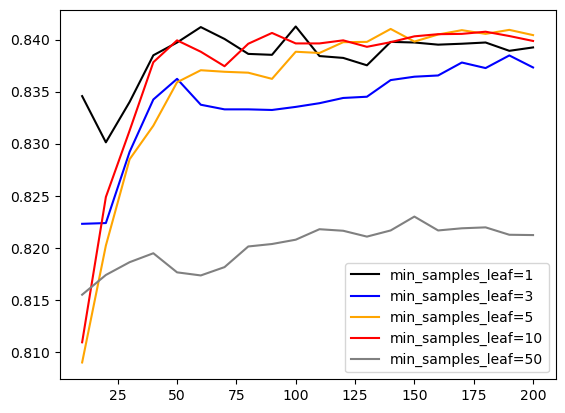

In [32]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

Best min_sample_leaf is 1 at 60 iterations

In [34]:
rf = RandomForestClassifier(n_estimators=60,
                            max_depth=10,
                            min_samples_leaf=1,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=60, random_state=1)

In [35]:
y_pred = rf.predict_proba(X_val)[:, 1]

In [36]:
roc_auc_score(y_val, y_pred)

0.8411942241685406

The roc auc score for the random forest model is 0.841 on the validation set

## XGBoost

In [37]:
import xgboost as xgb
# The DMatrix allows for the XGBoost model to train faster as the DMatrix is optimised for the model. 
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

c:\Users\Pastor\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [38]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8183069002248787

The ROC AUC score with the default parameters in XGBoost is 0.818 on the validation set

In [39]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

Let's optimize for eta

In [40]:
evals_result = {}
scores = {}
for eta in [0.001, 0.003, 0.005, 0.01,  0.1, 0.3]:
    xgb_params = {
        'eta': eta, 
        'max_depth': 6,
        'min_child_weight': 1,
        
        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=200, evals_result=evals_result,
                    verbose_eval=100,
                    evals=watchlist)

    df_scores = pd.DataFrame([evals_result['train']['auc'], evals_result['val']['auc']]).T
    df_scores.columns = ['train', 'val_auc']
    df_scores['num_iter'] = df_scores.index
    scores[f'eta={eta}'] = df_scores

[0]	train-auc:0.87140	val-auc:0.79958
[100]	train-auc:0.88309	val-auc:0.80873
[199]	train-auc:0.88864	val-auc:0.80986
[0]	train-auc:0.87140	val-auc:0.79958
[100]	train-auc:0.90186	val-auc:0.81149
[199]	train-auc:0.91513	val-auc:0.81681
[0]	train-auc:0.87140	val-auc:0.79958
[100]	train-auc:0.91221	val-auc:0.81881
[199]	train-auc:0.92516	val-auc:0.82167
[0]	train-auc:0.87140	val-auc:0.79958
[100]	train-auc:0.92610	val-auc:0.82143
[199]	train-auc:0.94570	val-auc:0.82388
[0]	train-auc:0.87140	val-auc:0.79958
[100]	train-auc:0.99154	val-auc:0.82643
[199]	train-auc:0.99973	val-auc:0.82155
[0]	train-auc:0.87140	val-auc:0.79958
[100]	train-auc:1.00000	val-auc:0.80734
[199]	train-auc:1.00000	val-auc:0.80285


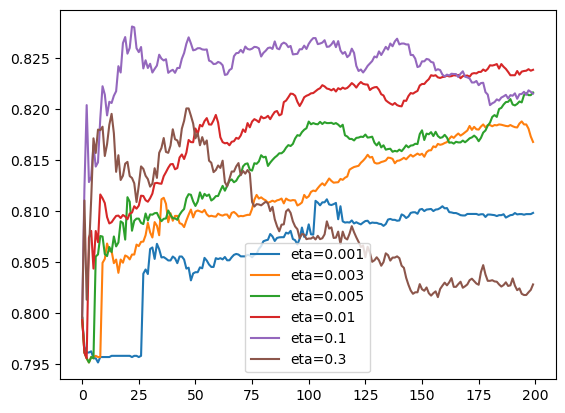

In [41]:
etas = ['eta=0.001','eta=0.003','eta=0.005','eta=0.01', 'eta=0.1', 'eta=0.3']

for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label = eta)
plt.legend()

Optimal eta=0.1 at 20 iterations, even though we need to be carefull since it is prone to overfit with many iterations

### Optimze for max_depth

In [42]:
evals_result = {}
scores = {}
for depth in [1, 3, 6, 7]:
    xgb_params = {
        'eta': 0.1, 
        'max_depth': depth,
        'min_child_weight': 1,
        
        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=200, evals_result=evals_result,
                    verbose_eval=100,
                    evals=watchlist)

    df_scores = pd.DataFrame([evals_result['train']['auc'], evals_result['val']['auc']]).T
    df_scores.columns = ['train', 'val_auc']
    df_scores['num_iter'] = df_scores.index
    scores[f'max_depth={depth}'] = df_scores

[0]	train-auc:0.70557	val-auc:0.68126
[100]	train-auc:0.83979	val-auc:0.82776
[199]	train-auc:0.85220	val-auc:0.84435
[0]	train-auc:0.81129	val-auc:0.77753
[100]	train-auc:0.91810	val-auc:0.83812
[199]	train-auc:0.95569	val-auc:0.83070
[0]	train-auc:0.87140	val-auc:0.79958
[100]	train-auc:0.99154	val-auc:0.82643
[199]	train-auc:0.99973	val-auc:0.82155
[0]	train-auc:0.88116	val-auc:0.79425
[100]	train-auc:0.99852	val-auc:0.82338
[199]	train-auc:0.99998	val-auc:0.81711


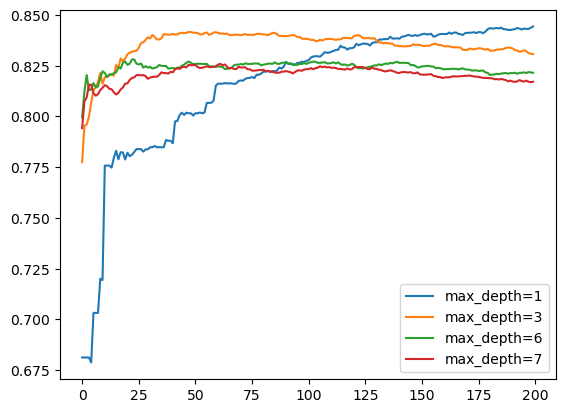

In [43]:
max_depth = ['max_depth=1','max_depth=3','max_depth=6', 'max_depth=7']

for d in max_depth:
    df_score = scores[d]
    plt.plot(df_score.num_iter, df_score.val_auc, label = d)
plt.legend()

The best max_depth in this dataset is 1 at 175 iterations

### Optimize for min_child_weight

In [44]:
evals_result = {}
scores = {}
for child in [1, 3, 5, 7]:
    xgb_params = {
        'eta': 0.1, 
        'max_depth': 1,
        'min_child_weight': child,
        
        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=200, evals_result=evals_result,
                    verbose_eval=100,
                    evals=watchlist)

    df_scores = pd.DataFrame([evals_result['train']['auc'], evals_result['val']['auc']]).T
    df_scores.columns = ['train', 'val_auc']
    df_scores['num_iter'] = df_scores.index
    scores[f'min_child_weight={child}'] = df_scores

[0]	train-auc:0.70557	val-auc:0.68126
[100]	train-auc:0.83979	val-auc:0.82776
[199]	train-auc:0.85220	val-auc:0.84435
[0]	train-auc:0.70557	val-auc:0.68126
[100]	train-auc:0.83979	val-auc:0.82776
[199]	train-auc:0.85224	val-auc:0.84423
[0]	train-auc:0.70557	val-auc:0.68126
[100]	train-auc:0.83894	val-auc:0.82751
[199]	train-auc:0.85155	val-auc:0.84445
[0]	train-auc:0.70557	val-auc:0.68126
[100]	train-auc:0.83793	val-auc:0.82536
[199]	train-auc:0.84907	val-auc:0.84235


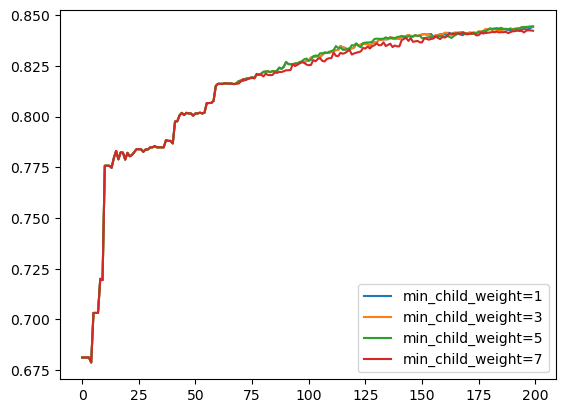

In [45]:
min_child_parameters= ['min_child_weight=1','min_child_weight=3','min_child_weight=5', 'min_child_weight=7']

for c in min_child_parameters:
    df_score = scores[c]
    plt.plot(df_score.num_iter, df_score.val_auc, label = c)
plt.legend()

The best min_child weight for this dataset is 7, we pick this because it reach the highest score in the validation set

The final model:

- min_child_weight = 7
- max_depth = 1
- eta (learning rate) = 0.1
- num_iter = 150

This final model reach up to 0.85 in the validation set

## Final model

In [49]:
df_train_full = pd.concat([df_train, df_val])

In [50]:
df_train_full = df_train_full.reset_index(drop=True)
y_train_full = df_train_full[categorical[0]]

y_test = df_test[categorical[0]]

In [51]:
dicts_full_train = df_train_full[numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test[numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)


dfulltrain = xgb.DMatrix(X_full_train, label=y_train_full)
dtest = xgb.DMatrix(X_test)

In [52]:
xgb_params = {
    'eta':0.1,
    'max_depth': 1,
    'min_child_weight':7,

    'objective':'binary:logistic',
    'eval_metric':'auc',

    'nthread':8,
    'seed':1,
    'verbosity':1

}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=150)

In [53]:
y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.8211829022859032

The results on the testing set show that the roc auc score is 0.82

In [ ]:
# this needs to run in the notebook
#import bentoml
#bentoml.xgboost.save_model("credit_risk_model", model,
#                            custom_objects={
#                                "dictVectorizer":dv
#                            },
#                            signatures={
#                                "predict": {
#                                    "batchable":True,
#                                    "batch_dim":0,
#                                }
#                            })